In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import datetime as dt
import statsmodels.api as sm
import seaborn as sns

In [13]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [14]:
df.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
397,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
398,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
399,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

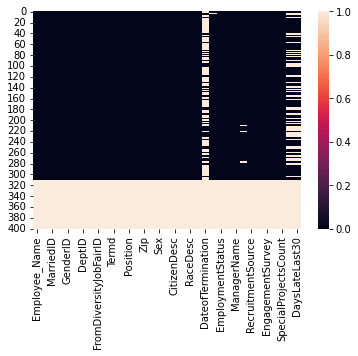

In [15]:
sns.heatmap(df.isnull())

<AxesSubplot:>

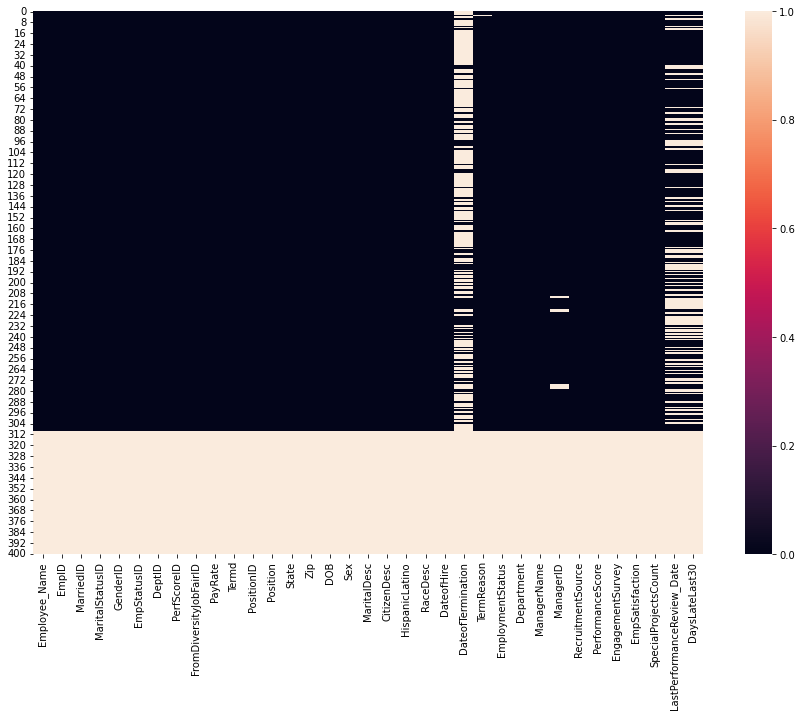

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [17]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [18]:
df.dropna(thresh=2,inplace=True)

In [19]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [20]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [23]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%Y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%Y')

ValueError: time data '11/24/87' does not match format '%m/%d/%Y' (match)

In [24]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [25]:
sns.set_style('darkgrid')

c:\users\may\pycharmprojects\panda\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PayRate', ylabel='Density'>

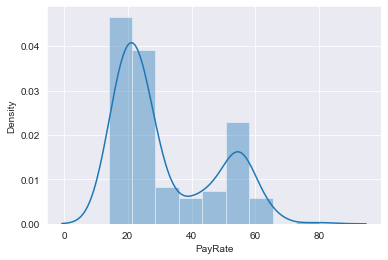

In [26]:
sns.distplot(df['PayRate'])

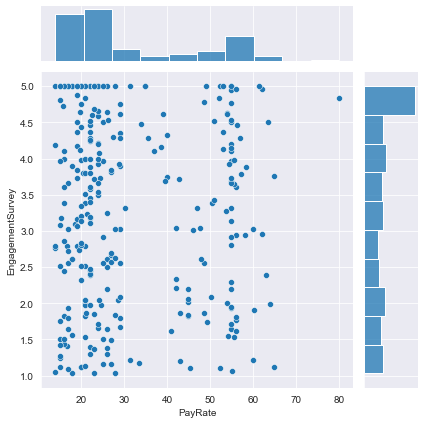

In [27]:
sns.jointplot(x='PayRate',y='EngagementSurvey',data=df)

In [28]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [32]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'str'

In [30]:
df[['DateofHire','DateofTermination','Seniority']].head()

KeyError: "['Seniority'] not in index"

ValueError: Could not interpret value `Seniority` for parameter `y`

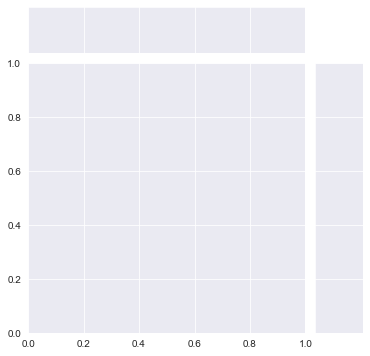

In [33]:
sns.jointplot(x='PayRate',y='Seniority',data=df,kind='hex')

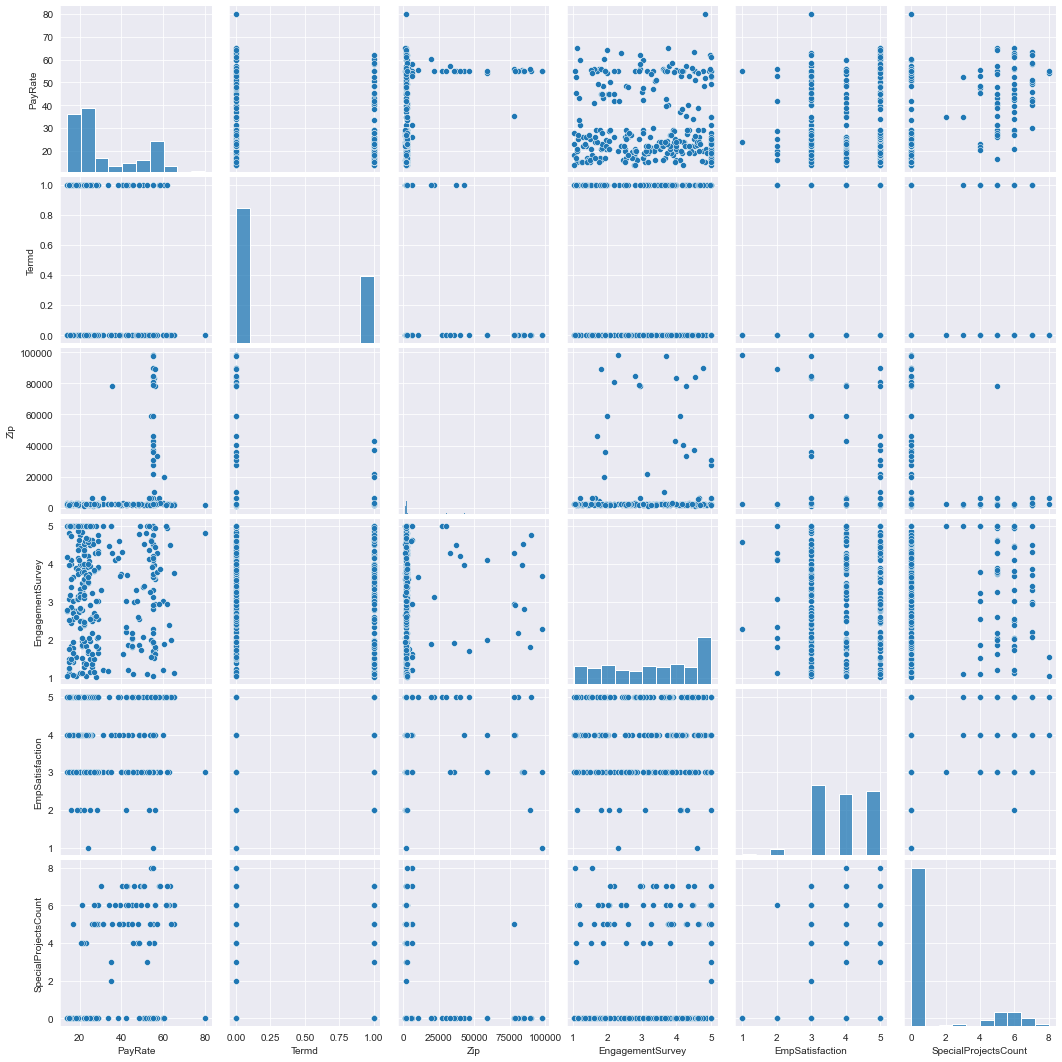

In [34]:
sns.pairplot(df[df.columns[~df.columns.str.endswith('ID')]].select_dtypes(float))

<AxesSubplot:xlabel='Department', ylabel='PayRate'>

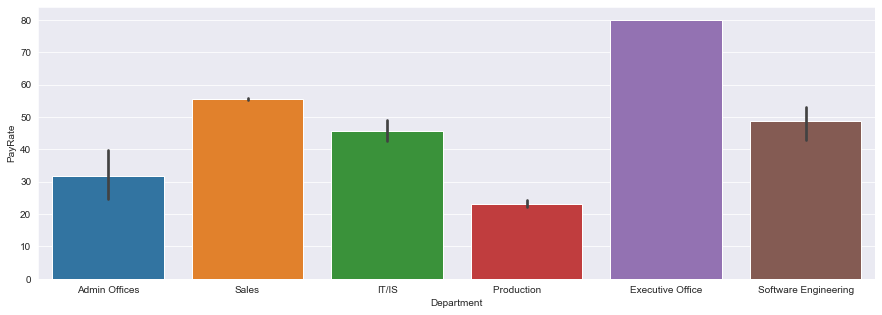

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x='Department',y='PayRate',data=df)

<AxesSubplot:xlabel='Department', ylabel='PayRate'>

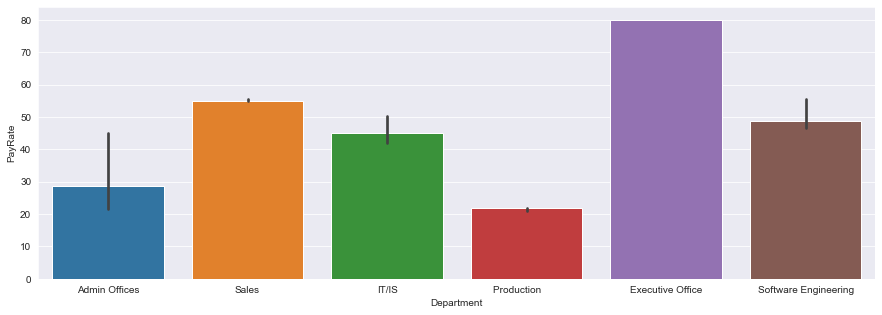

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x='Department',y='PayRate',data=df,estimator=np.median)

<AxesSubplot:xlabel='Department', ylabel='count'>

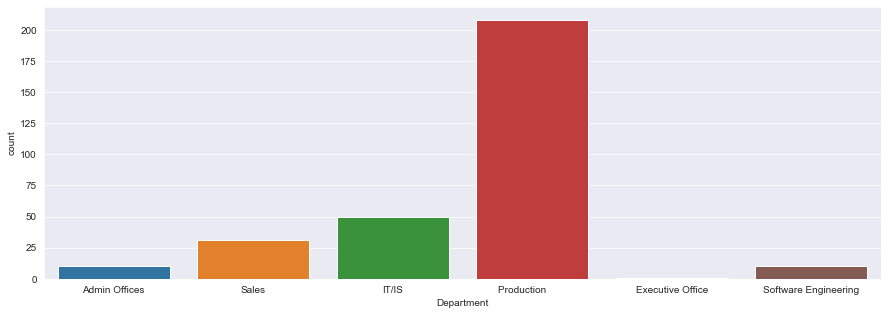

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(x='Department',data=df)

<AxesSubplot:xlabel='Sex', ylabel='PayRate'>

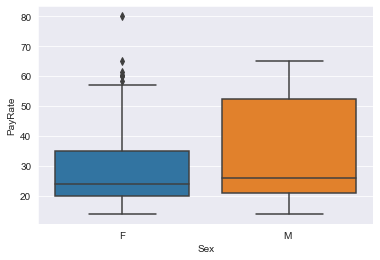

In [38]:
sns.boxplot(x='Sex',y='PayRate',data=df)

In [39]:
pd.crosstab(df['Department'],df['Sex'])

Sex,F,M
Department,,
Admin Offices,6,4
Executive Office,1,0
IT/IS,22,28
Production,127,81
Sales,15,16
Software Engineering,6,4


<AxesSubplot:xlabel='Sex', ylabel='PayRate'>

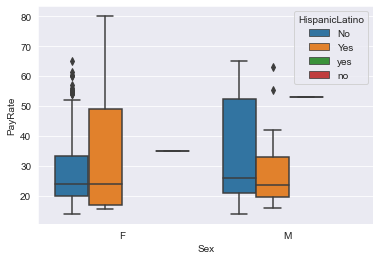

In [40]:
sns.boxplot(x='Sex',y='PayRate',data=df,hue='HispanicLatino')

In [41]:
df['HispanicLatino'] = df['HispanicLatino'].str.title()

<AxesSubplot:xlabel='Sex', ylabel='PayRate'>

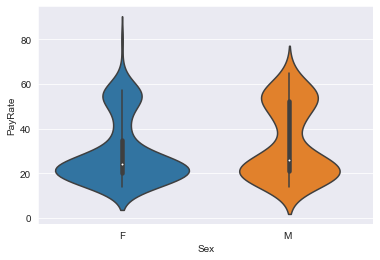

In [42]:
sns.violinplot(x='Sex',y='PayRate',data=df)

<AxesSubplot:xlabel='Sex', ylabel='PayRate'>

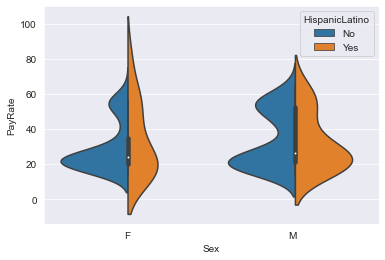

In [43]:
sns.violinplot(x='Sex',y='PayRate',data=df,hue='HispanicLatino',split=True)

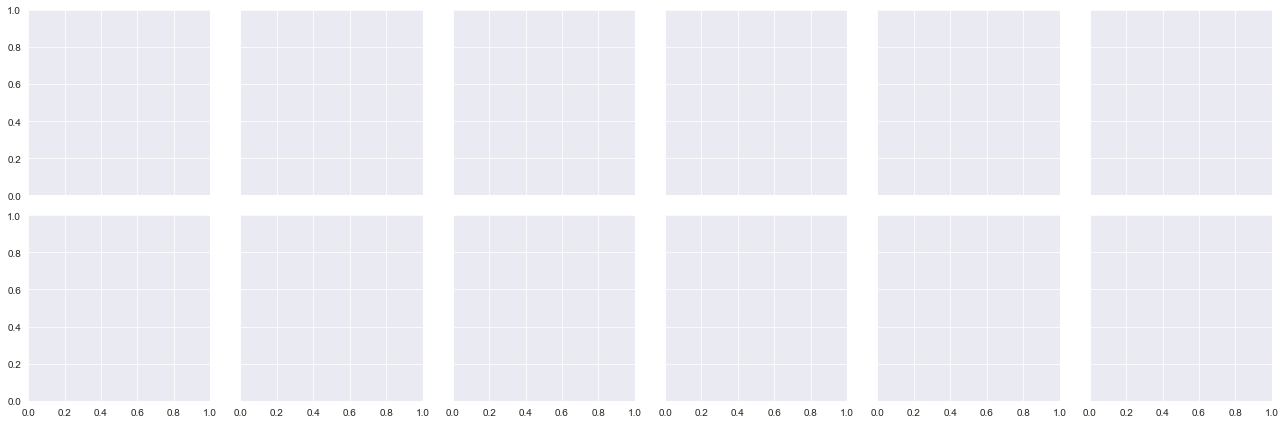

In [44]:
g = sns.FacetGrid(data=df,col='Department',row='Sex')

KeyError: "['Seniority'] not in index"

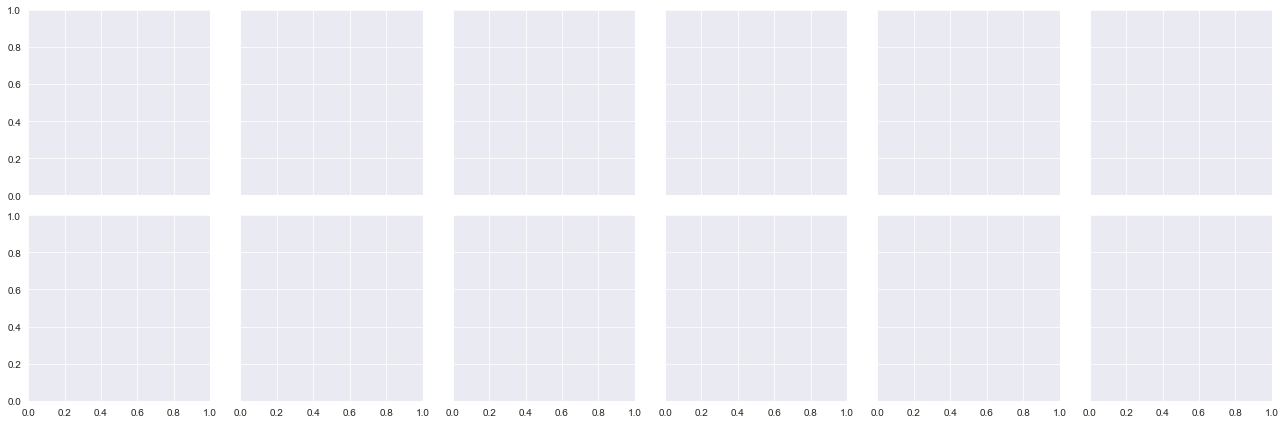

In [45]:
g = sns.FacetGrid(data=df,col='Department',row='Sex')
g.map(plt.scatter,'Seniority','PayRate')

In [46]:
sns.lmplot(x='Seniority',y='PayRate',data=df[(df['Department']=='Production       ')],hue='Sex',markers=['o','v'],
          scatter_kws={'s':50})

KeyError: "['Seniority'] not in index"

In [47]:
sns.lmplot(x='Seniority',y='PayRate',data=df[(df['Department']=='Production

SyntaxError: EOL while scanning string literal (Temp/ipykernel_4932/2586651879.py, line 1)

In [48]:
df.pivot_table(index=df['DateofHire'].dt.month,columns=df['DateofHire'].dt.day,values='EmpID',aggfunc='count').fillna(0)

AttributeError: Can only use .dt accessor with datetimelike values

In [49]:
plt.figure(figsize=(15,5))
sns.heatmap(df.pivot_table(index=df['DateofHire'].dt.month,columns=df['DateofHire'].dt.day,values='EmpID',aggfunc='count').fillna(0))

AttributeError: Can only use .dt accessor with datetimelike values

<Figure size 1080x360 with 0 Axes>